# Random Forest

In [1]:
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))
from models import (
    rf_random_search,
    rf_grid_search,
    model_evaluation 
)
import warnings
warnings.filterwarnings("ignore")
import pickle
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform
def save_object(obj, filename): 
    with open(filename, 'wb') as output: 
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL) 

### First Approach - Random Forest without over-sampling (SMOTE)

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
X_train = train.drop(columns = ['death'])
y_train = train['death']

X_test = test.drop(columns = ['death'])
y_test = test['death']

Random Search

In [4]:
param_distribution = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(4, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [5]:
best_random_rf, best_thresh_random_rf = rf_random_search(X_train,y_train,param_distribution)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for Random Forest (Random Search): {'bootstrap': True, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 258}
Best ROC-AUC for Random Forest (Random Search): 0.8487858099284799
Optimal threshold (in terms of Youden statistic): 0.601
True Positive Rate: 0.864
False Positive Rate: 0.106


AUC-ROC: 0.8473
Confusion matrix (threshold = 0.601):
TN: 416, FP: 161, FN: 244, TP: 986

Classification report:
              precision    recall  f1-score   support

         0.0      0.630     0.721     0.673       577
         1.0      0.860     0.802     0.830      1230

    accuracy                          0.776      1807
   macro avg      0.745     0.761     0.751      1807
weighted avg      0.786     0.776     0.779      1807



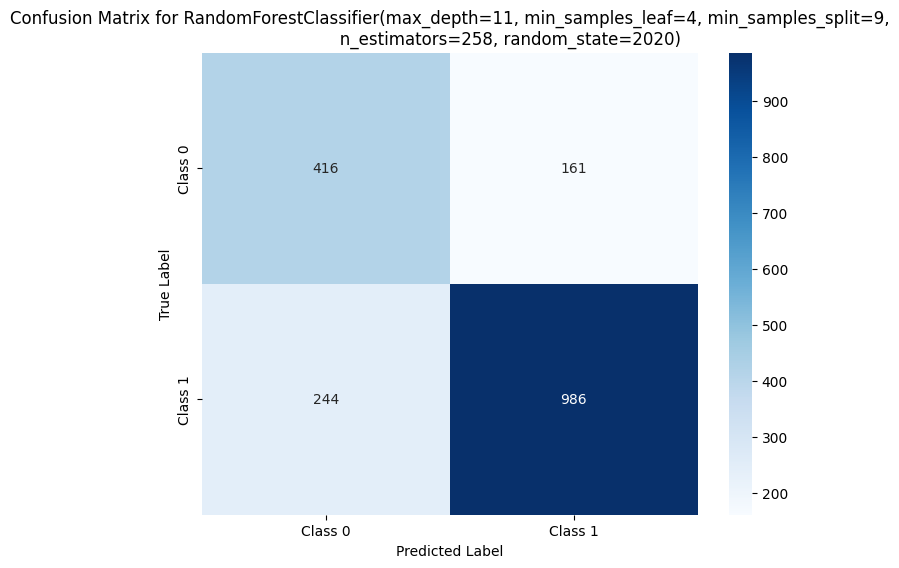

In [6]:
model_evaluation(X_test,y_test,best_random_rf,best_thresh_random_rf)

Grid Search

In [7]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [8]:
best_grid_rf, best_thresh_grid_rf = rf_grid_search(X_train,y_train,param_grid)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest (Grid Search): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC for Random Forest (Grid Search): 0.8481448316582917
Optimal threshold (in terms of Youden statistic): 0.598
True Positive Rate: 0.859
False Positive Rate: 0.101


AUC-ROC: 0.8479
Confusion matrix (threshold = 0.598):
TN: 412, FP: 165, FN: 244, TP: 986

Classification report:
              precision    recall  f1-score   support

         0.0      0.628     0.714     0.668       577
         1.0      0.857     0.802     0.828      1230

    accuracy                          0.774      1807
   macro avg      0.742     0.758     0.748      1807
weighted avg      0.784     0.774     0.777      1807



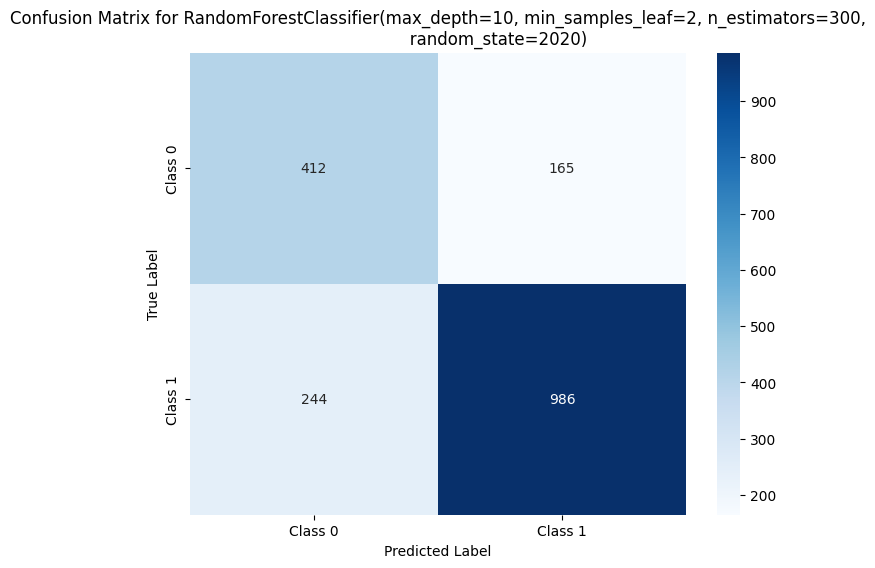

In [9]:
model_evaluation(X_test,y_test,best_grid_rf,best_thresh_grid_rf)

### Second Approach - Random Forest with over-sampling (SMOTE)

In [10]:
smote = SMOTE(random_state=2020)

In [11]:
X_train_1, y_train_1 = smote.fit_resample(X_train, y_train)

Random Search

In [12]:
param_distribution_1 = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(4, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [13]:
best_random_rf_1, best_thresh_random_rf_1 = rf_random_search(X_train_1,y_train_1,param_distribution_1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for Random Forest (Random Search): {'bootstrap': False, 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 298}
Best ROC-AUC for Random Forest (Random Search): 0.9273631486493201
Optimal threshold (in terms of Youden statistic): 0.386
True Positive Rate: 0.999
False Positive Rate: 0.001


AUC-ROC: 0.8456
Confusion matrix (threshold = 0.386):
TN: 280, FP: 297, FN: 116, TP: 1114

Classification report:
              precision    recall  f1-score   support

         0.0      0.707     0.485     0.576       577
         1.0      0.790     0.906     0.844      1230

    accuracy                          0.771      1807
   macro avg      0.748     0.695     0.710      1807
weighted avg      0.763     0.771     0.758      1807



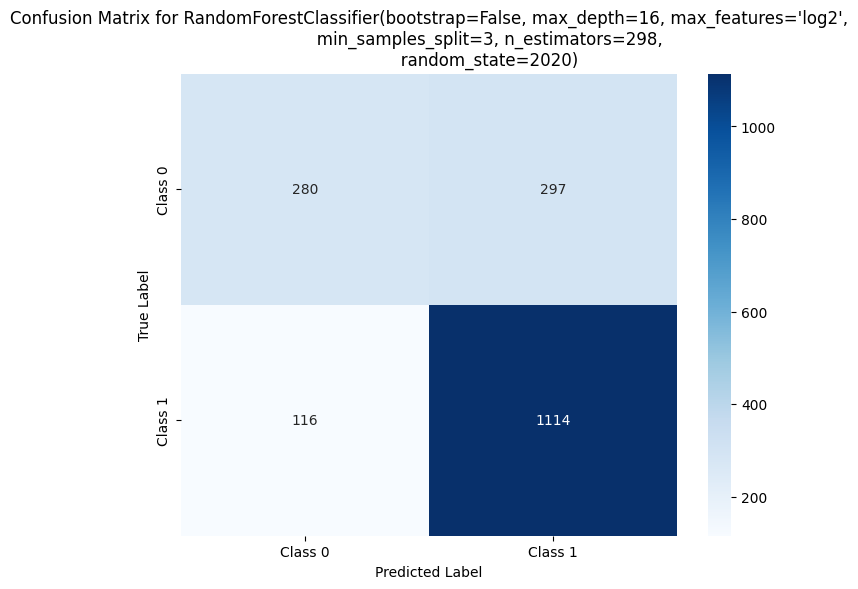

In [14]:
model_evaluation(X_test,y_test,best_random_rf_1,best_thresh_random_rf_1)

Grid Search

In [15]:
param_grid_1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [16]:
best_grid_rf_1, best_thresh_grid_rf_1 = rf_grid_search(X_train_1,y_train_1,param_grid_1)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest (Grid Search): {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC-AUC for Random Forest (Grid Search): 0.931061935681387
Optimal threshold (in terms of Youden statistic): 1.000
True Positive Rate: 1.000
False Positive Rate: 0.000


AUC-ROC: 0.8429
Confusion matrix (threshold = 1.000):
TN: 577, FP: 0, FN: 1227, TP: 3

Classification report:
              precision    recall  f1-score   support

         0.0      0.320     1.000     0.485       577
         1.0      1.000     0.002     0.005      1230

    accuracy                          0.321      1807
   macro avg      0.660     0.501     0.245      1807
weighted avg      0.783     0.321     0.158      1807



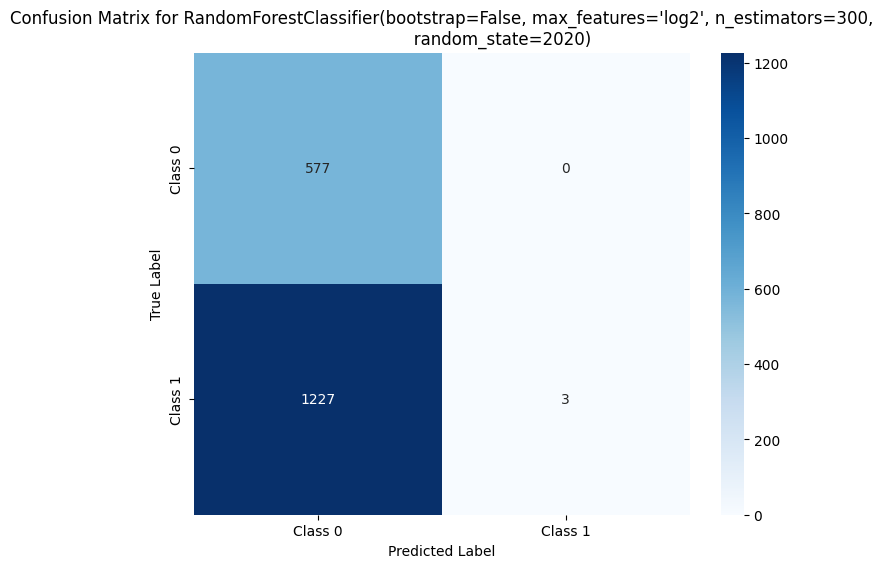

In [17]:
model_evaluation(X_test,y_test,best_grid_rf_1,best_thresh_grid_rf_1)

### AUC-ROC: ###
- Processed Data:
    - Random Search: 0.8473
    - Grid Search: 0.8479
- Processed Data with SMOTE:
    - Random Search: 0.8456
    - Grid Search: 0.8429


### Saving the best model

In [18]:
with open("../models/xgb_model.pkl", "wb") as f:
    pickle.dump(best_grid_rf, f)